<a href="https://colab.research.google.com/github/gchn24/DS-Notes/blob/main/knn_blinkit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('https://gist.github.com/singhsidhukuldeep/cc3c9597bce35f5f242a921eb3361c75/raw/54227431f0dc8ac1c438f438e2174d181fdda330/blinkit_multiclass.csv')
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


**Data Description**

|feature|Description|
|-|-|
|**Region**|where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)|
|**Fresh**|purchase history of Fresh food|
|**Milk**|purchase history of milk product|
|**Grocery**|purchase history of Grocery|
|**Frozen**|purchase history of Frozen food|
|**Detergents_Paper**|purchase history of washing products|
|**Delicassen**|purchase history of imported products, cooked meat|
|**class**|Store catgeory based on demand on products|





<Axes: xlabel='class', ylabel='count'>

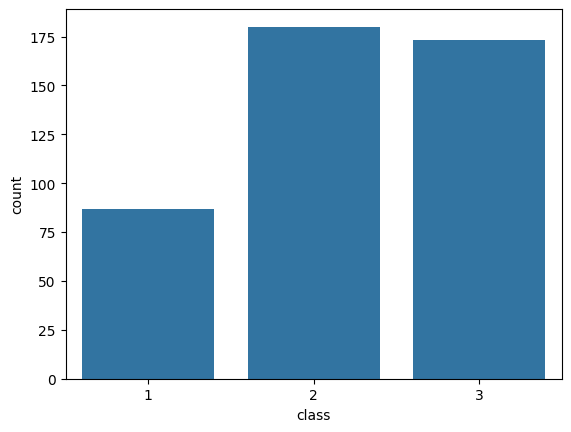

In [ ]:
import seaborn as sns
sns.countplot(data=df, x="class")

In [ ]:
X=df[['Region',	'Fresh',	'Milk',	'Grocery',	'Frozen',	'Detergents_Paper',	'Delicassen']].copy()
y=df[['class']].copy()

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# reducing features to just 2 features
pca = PCA(n_components=2)
print(X.shape)
X = pca.fit_transform(X)
print(X.shape)

(440, 7)
(440, 2)


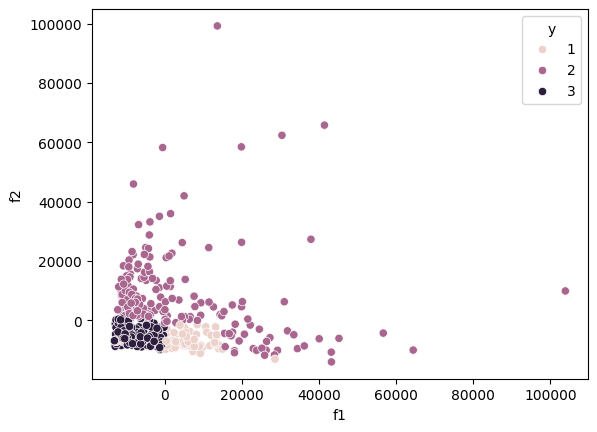

In [ ]:
df2 = pd.DataFrame(X, columns=['f1', 'f2'])
df2['y'] = y

sns.scatterplot(data= df2, x= 'f1',y = 'f2' , hue = 'y')
plt.show()

In [ ]:
## train test split

from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X,
                                                    y.values[:,0],
                                                    test_size=0.25, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                    y_train_val,
                                                    test_size=0.25, random_state=42)

In [ ]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(247, 2) (247,)
(83, 2) (83,)
(110, 2) (110,)


In [ ]:
np.unique(y_train, return_counts=True)

(array([1, 2, 3]), array([53, 95, 99]))

In [ ]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

y_train.shape

(297,)

In [ ]:
np.unique(y_train, return_counts=True)

(array([1, 2, 3]), array([99, 99, 99]))

In [ ]:
#imbalance effects KNN

In [ ]:
# standardisation
mu = X_train.mean(axis=0)
sig = X_train.std(axis=0)

In [ ]:
X_train = (X_train-mu)/sig
X_val = (X_val-mu)/sig
X_test = (X_test-mu)/sig

In [ ]:
# finding dist of xq(100th here) from 5(random) points

In [ ]:
X_train[:5]-X_train[100] # xa-xb, ya-yb....

array([[ 1.56486081,  0.74903286],
       [ 0.06230862,  0.48933573],
       [ 3.10736937,  0.04905372],
       [-0.50155281,  0.18546062],
       [-0.58694211,  0.66108629]])

In [ ]:
(X_train[:5]-X_train[100])**2 # (xa-xb)**2, (ya-yb)**2....

array([[2.44878935e+00, 5.61050230e-01],
       [3.88236470e-03, 2.39449456e-01],
       [9.65574443e+00, 2.40626752e-03],
       [2.51555216e-01, 3.43956425e-02],
       [3.44501042e-01, 4.37035086e-01]])

In [ ]:
np.sum((X_train[:5]-X_train[100])**2, axis=1)

array([3.00983958, 0.24333182, 9.6581507 , 0.28595086, 0.78153613])

In [ ]:
np.sqrt(np.sum((X_train[:5]-X_train[100])**2, axis=1))

array([1.73488892, 0.49328675, 3.10775654, 0.53474373, 0.88404532])

In [ ]:
## KNN Algo

def knn(X,Y,queryPoint,k=5):
    """Predict the class label for the query point"""
    # Euclidean Distance
    dist = np.sqrt(np.sum((queryPoint-X)**2,axis=1) )

    # Storing distance and Class labels together
    distances = [(dist[i],Y[i]) for i in range(len(dist)) ]
    # sort the distances
    distances = sorted(distances, key=lambda x:x[0]) # ascending order
    # Nearest/First K points
    distances = distances[:k]

    print(f'k nearest neighbors with the distance and class label :{distances}')
    distances = np.array(distances)

    # https://numpy.org/doc/stable/reference/generated/numpy.unique.html
    classes_counts = np.unique(distances[:,1],return_counts=True)
    print(classes_counts)

    index = classes_counts[1].argmax()
    print("index of max count: ", index)
    pred = classes_counts[0][index]

    return int(pred)

In [ ]:
## predicting
print("Xq:", X_test[50])
print("prediction: ", knn(X_train, y_train, X_test[50]))
print("actual: ", y_test[50])

Xq: [0.0254483  1.40523356]
k nearest neighbors with the distance and class label :[(0.19027933630724084, 2), (0.3350695185329479, 2), (0.40414845948274986, 2), (0.42896758153803266, 2), (0.5476737125547411, 2)]
(array([2.]), array([5]))
index of max count:  0
prediction:  2
actual:  2


In [ ]:
## predicting
print("Xq:", X_test[4])
print("prediction: ", knn(X_train, y_train, X_test[4]))
print("actual: ", y_test[4])

Xq: [-1.18792082 -0.55168088]
k nearest neighbors with the distance and class label :[(0.010852985636178456, 1), (0.04071672910730962, 3), (0.05679291331161154, 3), (0.07487569860854126, 3), (0.08841600463234804, 3)]
(array([1., 3.]), array([1, 4]))
index of max count:  1
prediction:  3
actual:  3


In [ ]:
y_pred = np.zeros(X_test.shape[0])

for i in range(X_test.shape[0]):
    y_pred[i] = knn(X_train, y_train, X_test[i])



k nearest neighbors with the distance and class label :[(0.10374135618828588, 2), (0.2905335592294664, 2), (0.2930106808991556, 2), (0.3187377494465211, 2), (0.37070334895154045, 2)]
(array([2.]), array([5]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.053887095744763955, 3), (0.06197797369476082, 3), (0.06833291624689634, 3), (0.07513164301902929, 3), (0.07752813826952777, 3)]
(array([3.]), array([5]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.14390440326661877, 2), (0.2836715546445907, 2), (0.42343883726614717, 2), (0.4770306145808404, 2), (0.520866693739346, 2)]
(array([2.]), array([5]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.28565928041918043, 2), (0.2935048261169011, 1), (0.30010900029576326, 1), (0.3036744166336267, 1), (0.3151858625736368, 1)]
(array([1., 2.]), array([4, 1]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.010

In [ ]:
print(f'Accuracy : ', round(100*(y_pred == y_test).sum()/y_pred.shape[0], 2))

Accuracy :  94.55


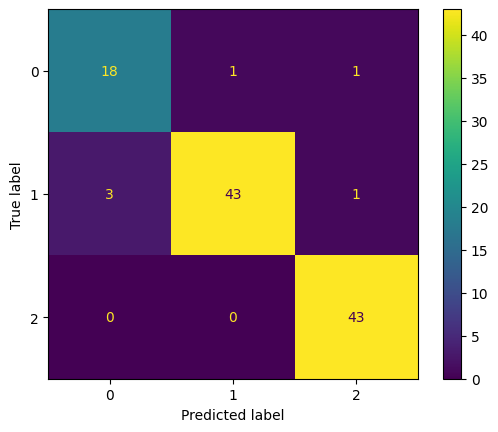

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm).plot()

In [ ]:
# Hyper-parameter tuning
def give_me_accuracy(k):
    y_pred = []

    for Xq in X_test:
        p = knn(X_train, y_train, Xq, k = k)
        y_pred.append(p)

    y_pred = np.array(y_pred)

    acc = (y_pred == y_test).sum() / len(y_test)
    return acc.round(5)*100

In [ ]:
scores = []
k_values = []


for k in range(1, 15):
    k_values.append(k)
    score = give_me_accuracy(k)
    scores.append(score)

k nearest neighbors with the distance and class label :[(0.10374135618828588, 2)]
(array([2.]), array([1]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.053887095744763955, 3)]
(array([3.]), array([1]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.14390440326661877, 2)]
(array([2.]), array([1]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.28565928041918043, 2)]
(array([2.]), array([1]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.010852985636178456, 1)]
(array([1.]), array([1]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.037291788715921696, 3)]
(array([3.]), array([1]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.09169753794900608, 3)]
(array([3.]), array([1]))
index of max count:  0
k nearest neighbors with the distance and class label :[(0.13582025108804519, 2)

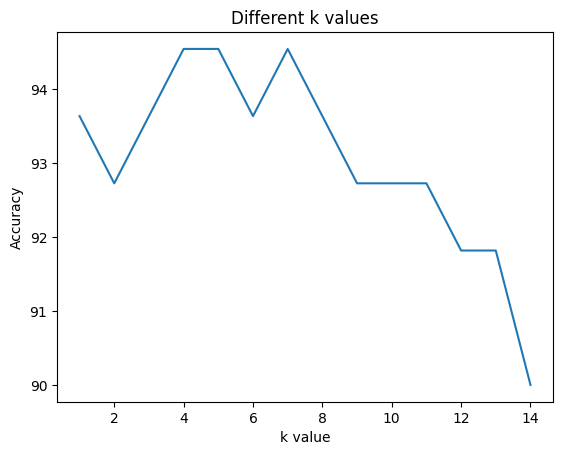

In [ ]:
plt.plot(k_values, scores)
plt.title("Different k values")
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
print(np.argmax(scores))
print("best k is", k_values[np.argmax(scores)])

3
best k is 4


In [ ]:
# Sklearn's KNN implementation
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

0.9454545454545454

In [ ]:
x_q = [X_test[50]]
y_q = y_test[50]
print(x_q)
print(y_q)
print(knn.predict(x_q))
print(knn.predict_proba(x_q))
print(knn.kneighbors(x_q))

[array([0.0254483 , 1.40523356])]
2
[2]
[[0. 1. 0.]]
(array([[0.19027934, 0.33506952, 0.40414846, 0.42896758, 0.54767371]]), array([[101, 176, 108,  30, 130]]))


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))
ConfusionMatrixDisplay(classification_report(y_test, y_pred))
plt.show()

              precision    recall  f1-score   support

           1       0.86      0.90      0.88        20
           2       0.98      0.91      0.95        47
           3       0.96      1.00      0.98        43

    accuracy                           0.95       110
   macro avg       0.93      0.94      0.93       110
weighted avg       0.95      0.95      0.95       110



## KNN imputation

In [ ]:
!gdown 1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
import pandas as pd
import numpy as np

df_imp = pd.read_csv('knn_imputation.csv')
df_imp.drop(['Unnamed: 0'],axis=1,inplace=True)
print(df_imp.shape)
df_imp.head()

Downloading...
From: https://drive.google.com/uc?id=1vDIXh1yJxLpmgdh3gZGM6WX0u3GCPuIS
To: /content/knn_imputation.csv
100% 12.9k/12.9k [00:00<00:00, 709kB/s]
(267, 7)


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3.0,12669.0,9656.0,7561.0,214.0,2674.0,1338.0
1,3.0,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,3.0,6353.0,8808.0,NaN,2405.0,3516.0,7844.0
3,3.0,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,3.0,22615.0,5410.0,7198.0,3915.0,1777.0,5185.0


In [ ]:
df_imp.isna().sum()

Region               8
Fresh               13
Milk                15
Grocery              9
Frozen               8
Detergents_Paper    10
Delicassen          11
dtype: int64

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

# Create the pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: StandardScaler for feature scaling
    ('imputer', KNNImputer(n_neighbors=5))  # Step 2: KNNImputer for missing value imputation
])

# Fit and transform the data using the pipeline
X_transformed = pipeline.fit_transform(df_imp)

# Creating dataframe
X_transformed = pd.DataFrame(X_transformed,columns=df_imp.columns)

X_transformed.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.555438,-0.233395,0.187310,-0.319038,-0.554681,-0.272830,-0.175386
1,0.555438,-0.616431,0.204632,-0.139260,-0.281917,-0.165147,-0.051741
2,0.555438,-0.664481,0.091925,0.200717,-0.168617,-0.126353,1.661231
3,0.555438,-0.192716,-0.764292,-0.618222,0.536025,-0.649809,-0.048353
4,0.555438,0.445450,-0.290291,-0.351554,0.097452,-0.428875,0.910606


In [ ]:
X_transformed.isna().sum()

Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

---

---

---

# **Understanding kNN**

#### How does kNN work with neighborhood of datapoint ?

Ans: Lets understand kNN with an example, Suppose **we have a test datapoint ($x^q = [2,5]$) and we have 6 training data such that**:

||f1|f2|y|
|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1
|$x^{(2)}$|6|4|1
|$x^{(3)}$|8|2|3
|$x^{(4)}$|7|5|3
|$x^{(5)}$|1|4|2
|$x^{(6)}$|2|2|2


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/474/original/Screenshot_2023-07-23_at_7.44.29_PM.png?1690130963 width=700>

1. **Step1:** We find the  **Euclidean distance between $x_q = [2,5]$ and all the training data.**


||f1|f2|y|$d^{(i)} = \sqrt{(x^q_{f1}-x^{(i)}_{f1})^2 + (x^q_{f2}-x^{(i)}_{f2})^2}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$\sqrt{(1^2 + 1^2)} = 1.41$|
|$x^{(2)}$|6|4|1|$\sqrt{(4^2 + 1^2)} = 3.00$|
|$x^{(3)}$|8|2|3|$\sqrt{(6^2 + 3^2)} = 6.48$|
|$x^{(4)}$|7|5|3|$\sqrt{(5^2 + 0^2)} = 5.00$|
|$x^{(5)}$|1|4|2|$\sqrt{(1^2 + 1^2)} = 1.41$|
|$x^{(6)}$|2|2|2|$\sqrt{(0^2 + 2^2)} = 2.00$|



  

<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/475/original/Screenshot_2023-07-23_at_7.44.37_PM.png?1690130998 width=700>

2. **Step2:** We sort the data based on the distances:

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|
|$x^{(2)}$|6|4|1|$3.00$|
|$x^{(4)}$|7|5|3|$5.00$|
|$x^{(3)}$|8|2|3|$6.48$|

<br>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/476/original/Screenshot_2023-07-23_at_7.44.47_PM.png?1690131021 width=700>


3. **Step 3:** Assume we pick the 3 datapoints such that:
-  The distance from $x_q$ is minimum

||f1|f2|y|$d^{(i)}$|
|:--|:--|:--|:--|:--|
|$x^{(1)}$|3|6|1|$1.41$|
|$x^{(5)}$|1|4|2|$1.41$|
|$x^{(6)}$|2|2|2|$2.00$|

Hence we pick $x^{(1)},x^{(5)},x^{(6)}$


<br>


<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/477/original/Screenshot_2023-07-23_at_7.44.57_PM.png?1690131095 width=700>


4. **Step4:** Find the majority vote on the class $(y)$ for these selected datapoints:
- And the **class which is in majority** becomes the **class label for $x_q$**

hence here  Class of $x_q = 2$

<br>

**Note:** This selection of datapoints  is done using a hyperparameter $k$,
- hence the algorithm is called $k$ nearest neighbors



<img src=https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/040/479/original/Screenshot_2023-07-23_at_7.45.06_PM.png?1690131159 width=700>

DEMO Link: http://vision.stanford.edu/teaching/cs231n-demos/knn/